## workflow
* dataset: fashion_mnist, prepare for it,  -- download/crop/transform to tensor so we have it
  1. wrap it into a fashion_mnist (child of dataModule) -- implement the get_dataloader from pytorch
  2. get_dataloader -- so we can constantly iterate and get batch from it 
  3. add visualization module to the mnist class

In [1]:
%matplotlib inline
import time
import torch
import torchvision
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

/home/flappy/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:716: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [5]:
class FashionMNIST(d2l.DataModule):  #@save
    """
    The Fashion-MNIST dataset.
    
    We do some preprocessing there. da
    """
    def __init__(self, batch_size=64, resize=(28, 28)):
        super().__init__()
        self.save_hyperparameters()
        trans = transforms.Compose([transforms.Resize(resize), 
                                    transforms.ToTensor()])
        self.train = torchvision.datasets.FashionMNIST(
            root=self.root, train=True, transform=trans, download=True)
        self.val = torchvision.datasets.FashionMNIST(
            root=self.root, train=False, transform=trans, download=True)
        
    def __len__(self):
        return len(self.train), len(self.val)

In [8]:
data = FashionMNIST()
len(data.train), len(data.val), data.train[0][0].shape

(60000, 10000, torch.Size([1, 28, 28]))

In [10]:
@d2l.add_to_class(FashionMNIST)  #@save
def text_labels(self, indices):
    """Return text labels."""
    labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
              'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    
    return [labels[int(i)] for i in indices]

In [20]:
@d2l.add_to_class(FashionMNIST)  #@save
def get_dataloader(self, train):
    '''Return a dataloader of FashionMNIST'''
    data = self.train if train else data.val
    return torch.utils.data.DataLoader(data, batch_size=self.batch_size, shuffle=train, num_workers=3)

In [ ]:
# examine the dateset 
X, y = next(iter(data.train_dataloader()))
X.shape, y.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

In [25]:
# 随时visualize是一个好习惯
@d2l.add_to_class(FashionMNIST)  #@save
def visualize(self, batch, rows=1, cols=8, labels=[]):
    '''
    Visualize the data in the Fashion dataset
    '''
    X, y = batch
    if not labels:
        labels = self.text_labels(y) 
    d2l.show_images(torch.squeeze(X), rows, cols, labels)    

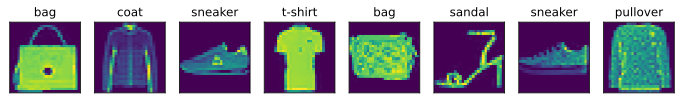

In [26]:
data.visualize(next(iter(data.train_dataloader())))